# <p style="text-align:center;">**California Housing Price**</p>
### <p style="text-align:center;">**Valeria Trisna Yunita**</p>
---

# 1. Business Understanding Problem

**Context**

California adalah sebuah negara bagian di Barat Amerika Serikat, terletak di sepanjang Pantai Pasifik Amerika dengan ibu kotanya adalah Sacramento. Pada tahun 2020, populasi California diperkirakan sekitar 39,5 juta orang, menjadikannya salah satu negara bagian paling padat penduduk di AS. Negara bagian ini mencakup luas wilayah 423.967 KM2. Kepadatan penduduk California sekitar 93,17 orang per KM2. Dari tahun 2010 hingga 2020, California mengalami peningkatan populasi sebesar 5,8%, yang setara dengan sekitar 2,4 juta penduduk tambahan.

Nilai suatu rumah sangat penting dalam menentukan status sosial masyarakat. Sebagai contohnya, dalam pengajuan kredit, nilai rumah tersebut menjadi acuan dalam nominal kredit yang dapat diberikan. Penilaian rumah atau apraisal biasanya dilakukan pada tahap analisa kredit. Dalam beberapa analisa kredit, apraisal rumah dilakukan oleh penilai kompeten. Dalam konteks pengajuan kredit, bank akan melakukan penaksiran atas nilai rumah yang akan dijadikan agunan. Terdapat dua pendekatan dalam menghitung nilai appraisal properti:

- Pendekatan Harga Pasar: Bank membandingkan rumah yang akan dijadikan agunan dengan tiga sampel rumah yang memiliki spesifikasi serupa. Rumah-rumah tersebut biasanya berasal dari wilayah yang sama. 
- Pendekatan Nilai Taksir Rumah: Pendekatan ini memperhitungkan biaya pembangunan dan depresiasi. Nilai taksir rumah dihitung berdasarkan biaya pembangunan dan nilai depresiasi. 



**Problem Statement**

Nilai appraisal rumah amatlah sangat penting bagi bank, mengingat hal tersebut akan dijadikan dasar dalam pemberian kredit. Apabila nilai apraisal under dari harga market tentu bank mengalami risiko kredit, sedangkan apabila nilai appraisal lebih dari harga pasar dari sisi bank tidak mengalami risiko, namun customer tentu bisa saja mengalami kerugian mengingat akan timbul biaya asuransi dan biaya notaris yang dikenakan dari nilai apraisal tersebut.

Tentunya kita memerlukan suatu model yang dapat menentukan suatu kewajaran rumah (appraisal) berdasarkan letak/posisi rumah, jumlah ruangan, jumlah kamar tidur, umur bangunan, populasi penduduk disekitar.

**Goals**

Tujuan dari model machine learning California Housing Price ini adalah untuk penentuan harga rumah/ appraisal, dengan features lokasi perumahan, umur bangunan, jumlah ruangan, jumlah kamar tidur, populasi, dan pendapatan dari penghuni rumah dan apakah mampu untuk dibandingkan dengan pendekatan harga pasar. 

**Analytic Approach**

Pendekatan analitik yang akan kami gunakan adalah pendekatan prediktif menggunakan teknik machine learning, khususnya dalam supervise regressor. Kami akan menggunakan dataset yang ada untuk melatih model yang dapat memprediksi  nilai suatu rumah berdasarkan variabel yang ada dalam dataset. Langkah-langkah utama dalam pendekatan ini mencakup pemrosesan data untuk persiapan, pemilihan fitur, pemodelan dengan algoritma yang sesuai dengan benchmarking model, seperti Linear Regresion, KNN Regresor, Decision Tree Regressor, Random Forest, & XGBoost Regressor, dan melakukan validasi model menggunakan metrik evaluasi yang tepat, dan penyesuaian model jika diperlukan.

**Metric Evaluation**

Dalam evaluasi model machine learning ini kita akan menggunakan dua metriks yaitu : 

1. Root Mean Squared Error (RMSE)
    RMSE adalah akar kuadrat dari rata-rata kuadrat kesalahan. Ini memberikan penekanan yang lebih besar pada kesalahan yang lebih besar karena kesalahan dikuadratkan sebelum dirata-rata dan diakar. RMSE sering digunakan ketika kesalahan besar perlu mendapat perhatian lebih dalam evaluasi model.   
    
    <img src="RMSE.png"/>

    Kapan menggunakan RMSE:
    1. Kesalahan Besar Lebih Penting: Jika kesalahan besar perlu diberi perhatian lebih (misalnya dalam aplikasi di mana kesalahan besar sangat berbahaya atau mahal), RMSE lebih cocok karena memberikan penalti yang lebih besar untuk kesalahan yang lebih besar.
    2. Model Evaluasi yang Lebih Ketat: RMSE dapat memberikan evaluasi yang lebih ketat terhadap model, karena menghukum kesalahan besar lebih keras. Ini bisa membantu dalam mendorong pengembangan model yang lebih presisi.
    3. Distribusi Normal dari Kesalahan: Jika residual Anda mengikuti distribusi normal, RMSE lebih sesuai karena sifat kuadratnya selaras dengan sifat distribusi normal dari kesalahan.


2. Mean Absolute Error (MAE)
    MAE adalah rata-rata dari selisih absolut antara nilai yang diprediksi oleh model dan nilai yang sebenarnya. Ini memberikan gambaran yang jelas tentang seberapa besar kesalahan rata-rata yang dibuat oleh model. MAE lebih mudah diinterpretasikan karena nilainya langsung terkait dengan unit dari data asli.

    <img src="MAE.png"/>

    Kapan menggunakan MAE:
    1. Kesalahan Seimbang: Jika Anda ingin memberikan bobot yang sama untuk semua kesalahan, maka MAE lebih cocok. MAE tidak mengeskalasi efek dari kesalahan besar, jadi lebih adil dalam memperlakukan semua jenis kesalahan secara sama.
    2. Robust Terhadap Outlier: MAE lebih robust terhadap outlier dibandingkan dengan RMSE karena tidak mengkuadratkan kesalahan. Jika data Anda memiliki outlier yang signifikan, MAE mungkin memberikan gambaran kinerja model yang lebih realistis.
    3. Interpretasi yang Sederhana: MAE lebih mudah diinterpretasikan karena satuan dari MAE sama dengan satuan dari variabel target, memberikan pandangan langsung tentang kesalahan prediksi rata-rata.

Namun dalam pengambilan keputusan kita akan menggunakan nilai MAE dan MAPE (percentage dari MAE) dengan pertimbangan nilai MAE lebih mudah untuk dilakukan intepretasi karna memiliki skala yang sama dengan variabel target dan memiliki outliers yang tinggi dari nilai residual.

Threshold nilai MAPE yang dikatakan baik sebagai berikut:

<img src="nterpretation-of-typical-MAPE-values.png"/>

**Import Library yang diperlukan**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')


# 2. Data Understanding


| Field               | Description                                           |
|---------------------|-------------------------------------------------------|
| longitude           | Koordinat geografis bujur rumah.                      |
| latitude            | Koordinat geografis lintang rumah.                    |
| housing_median_age  | Umur median rumah di distrik tertentu.                |
| total_rooms         | Jumlah total kamar di rumah-rumah distrik.            |
| total_bedrooms      | Jumlah total kamar tidur di rumah-rumah distrik.      |
| population          | Jumlah populasi di distrik tersebut.                  |
| households          | Jumlah rumah tangga di distrik tersebut.              |
| median_income       | Pendapatan median rumah tangga di distrik tersebut. (dalam $10.000)  |
| ocean_proximity     | Kedekatan rumah dengan lautan (variabel kategorikal).|
| median_house_value  | Nilai median rumah di distrik tersebut (variabel target).|

Data ini berisi informasi geografis dan statistik sensus tahun 1990 untuk rumah-rumah di distrik California. Fitur-fiturnya melibatkan lokasi, umur median rumah, jumlah kamar, populasi, pendapatan median, dan kedekatan dengan lautan, dengan tujuan memprediksi nilai median rumah di distrik tersebut.

**Import Data**

In [75]:
df = pd.read_csv('data_california_house.csv')

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


None

## **Exploratory Data Analysis**

In [76]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Dari tabel diatas dapat diambil kesimpulan sebagai berikut: 
* terdapat 10 feature dalam dataset yaitu longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, dan median house value
* Dimana  feature target untuk pemodelan dalam project ini adalah Median House Value (Nilai/Harga Rumah) yang akan buatkan modelingnya. Adapun rentang nilai tersebut dari $14.999 sd $500.001
* untuk melihat lebih lanjut sebaran data kita dapat menggunakan boxplot

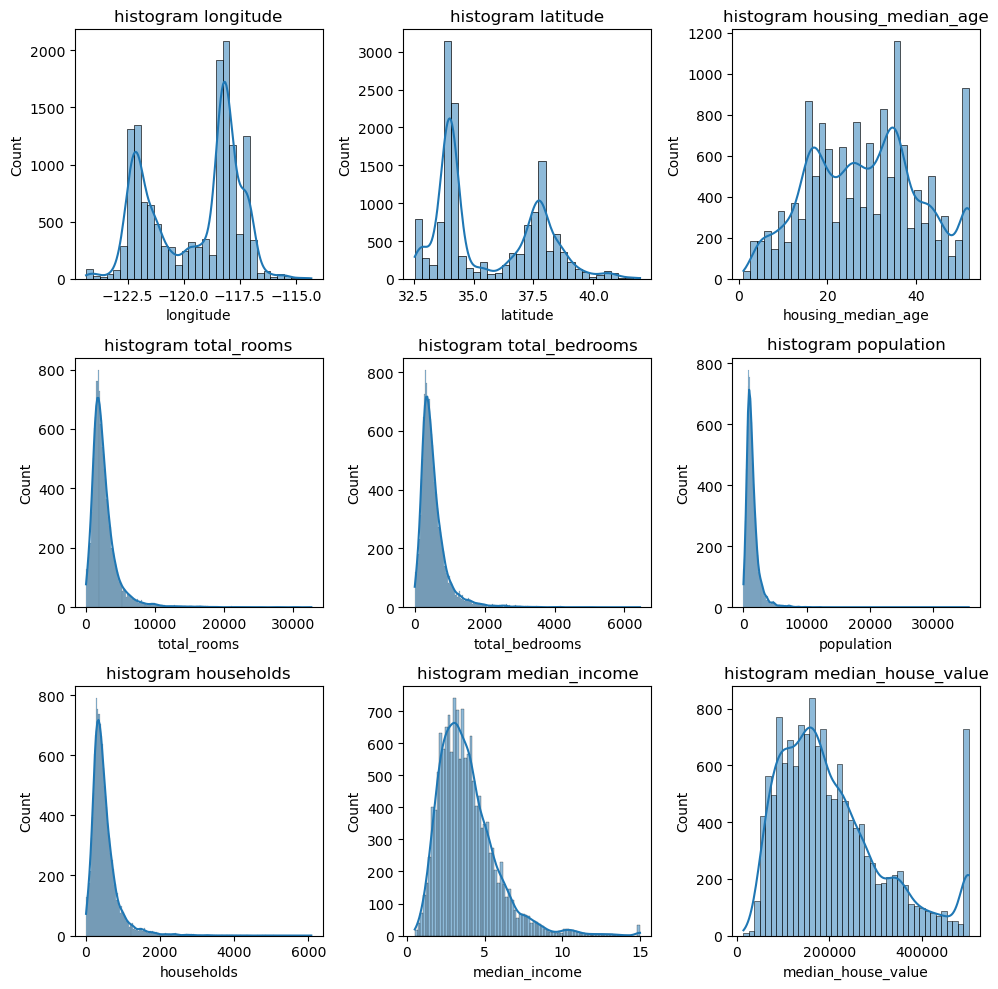

In [77]:
fig = plt.figure(figsize=(10,10)) # horizontal, vertikal

count = 0
for kolom in df.select_dtypes(include=['int','float']):
    count += 1
    plt.subplot(3,3,count)
    sns.histplot(df[kolom], kde=True)
    plt.title(f"histogram {kolom}")
fig.tight_layout() 
plt.show()

Dari plot histogram di atas dapat disimpulkan sebagai berikut: 
* Housing Median Age, Total Rooms, Total Bedrooms, Population, Households, Median Income, Median House Value tidak berdistribusi normal, dan memiliki 'right-skewed distribution'.
* apabila dilihat lebih detail, di akhir data median house value terdapat penumpukan data, hal ini mengindikasikan bahwa nilai maksimum ada di $500.001 dan lebih dari itu dikumpulkan di $500.001

In [78]:
df.describe(include='object')

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


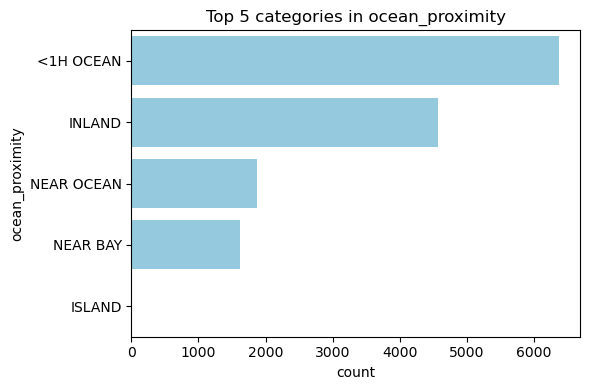

In [137]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().sort_values(ascending=False).head(5).index, color='skyblue')
    plt.title(f'Top 5 categories in {col}')
    plt.tight_layout()
    plt.show()


Data kategorik diatas dapat kita lihat sebaran rumah di California lebih banyak berada pada jarak <1H Ocean, sedangkan sebaran rumah yang berada di Island jumlahnya kurang dari 10 titik. Jumlah yang minim tersebut akan kita lakukan drop pada data tersebut karna nantinya model kurang baik untuk memprediksi harga rumah di Island.

**Sebaran Perumahan**

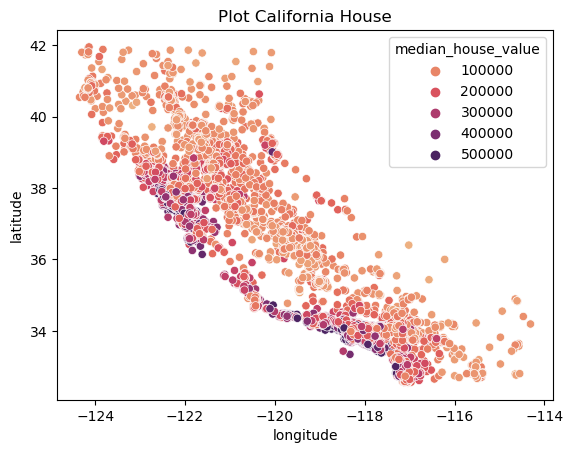

In [80]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'], palette='flare')
plt.title('Plot California House')

plt.show()


**Sebaran Populasi**

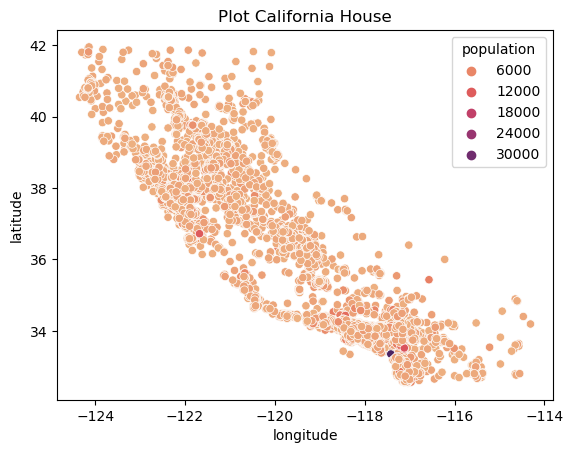

In [81]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['population'], palette='flare')
plt.title('Plot California House')

plt.show()


Dari plot sebaran diatas dapat disimpulkan sebagai berikut:
- Harga rumah yang mahal tersebar dipinggiran pantai, dan harga rumah di tengah lebih murah dibanding dipinggir pantai. 
- Populasi penduduk hampir tersebar merata disetiap distriknya

**Jarak Rumah dengan Ocean or Beach**

In [82]:
proximity_table = df.groupby('ocean_proximity').agg({'households': 'sum', 'median_house_value': lambda x: '{:,.0f}'.format(x.median())}).reset_index()
proximity_table

,ocean_proximity,households,median_house_value
0,<1H OCEAN,3294284.0,"214,800"
1,INLAND,2193608.0,"108,800"
2,ISLAND,604.0,"351,100"
3,NEAR BAY,778520.0,"230,800"
4,NEAR OCEAN,949889.0,"228,600"


Dari tabel diatas dapat kita simpulkan bahwa:
- harga rumah di kepulauan paling mahal diantara lainnya
- harga rumah di darat, lebih murah dibanding harga rumah yang dekat dengan pantai
- jumlah data untuk Island hanyak tersedia 2 baris, sehingga untuk menghindari kurangnya model median house value pada island akan dilakukan drop data.

## **Corelation**

<Axes: >

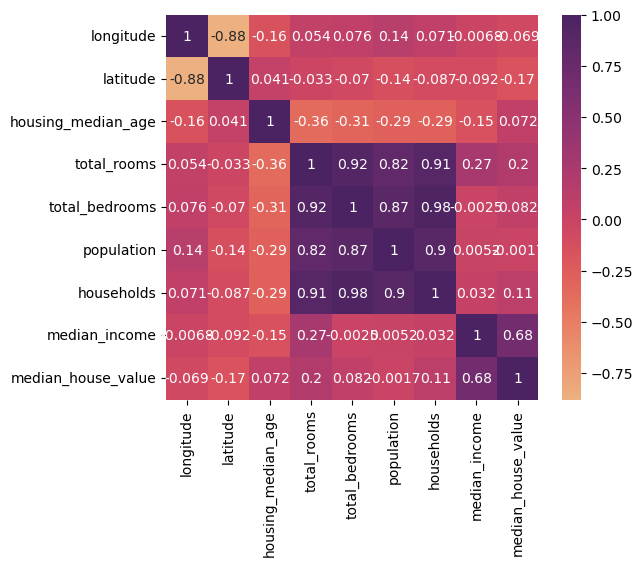

In [148]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(method='spearman'),annot=True,cmap='flare')

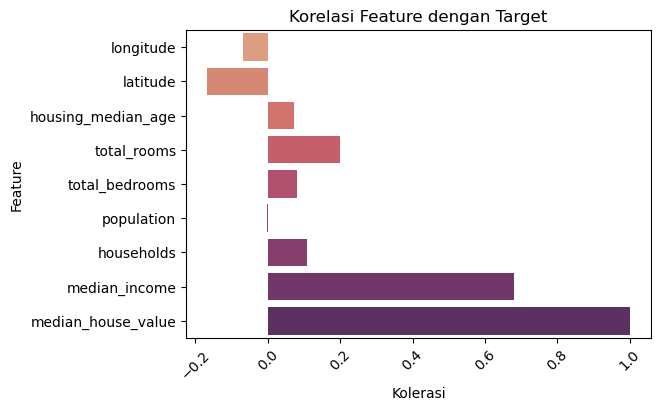

In [144]:
corr = df.select_dtypes(include=['int','float']).corr(method='spearman')

# Menggambar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=corr['median_house_value'], y=corr.columns, palette="flare",orient='h')
plt.xticks(rotation=45)
plt.title('Korelasi Feature dengan Target')
plt.xlabel('Kolerasi')
plt.ylabel('Feature')
plt.show()

Dari plot korelasi diatas dapat kita simpulkan beberapa hal sebagai berikut:
- terdapat korelasi yang kuat antara total rooms, total bedrooms, populations, dan household. Hal ini dapat mengindikasikan adanya multikolinearitas antar variabel independen. Hal ini dapat diantisipasi dengan melakukan Feature Engineering.
- Variabel target median house value memiliki korelasi yang kuat dengan median income.
- Variabel lainnya memiliki korelasi lemah sd cukup dengan variabel target.



# 3. Data Cleaning

In [85]:
df_model = df.copy()

In [86]:
pd.DataFrame({
    'Data Features': df_model.columns.values,
    'Data Type' : df_model.columns.dtype,
    'Null Value(%)': df_model.isna().mean().values * 100,
    'Duplicate Data' : df_model.duplicated().sum(),
    'Nunique Data': df_model.nunique().values,
    'Sample Unique': [df_model[col].unique() for col in df.columns]}
).round(3)

,Data Features,Data Type,Null Value(%),Duplicate Data,Nunique Data,Sample Unique
0,longitude,object,0.000,0,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,object,0.000,0,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,object,0.000,0,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,object,0.000,0,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,object,0.948,0,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,object,0.000,0,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,object,0.000,0,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,object,0.000,0,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0.000,0,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,object,0.000,0,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


## **Handling Missing Values**

<Axes: >

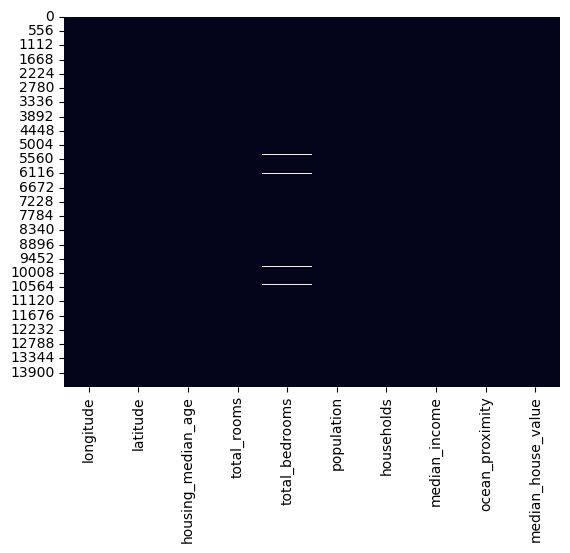

In [87]:
sns.heatmap(df_model.isnull(),cbar=False)

In [88]:
df_model[df_model['total_bedrooms'].isnull()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


Setelah dilakukan pengecekan bahwa terdapat 0,95% missing value pada kolom total bedrooms. Apabila dilihat dalam plot diatas, bahwa missing value tersebut masuk dalam jenis Missing Completely at Random (MCAR) yang mana nilai yang hilang dalam suatu variabel tidak berkorelasi dengan nilai-nilai lain dalam dataset. Sehingga salah satu action yang dapat dilakukan adalah dengan melakukan drop data pada nilai yang hilang tersebut. 

In [89]:
df_model = df_model.dropna()

## **Outliers**

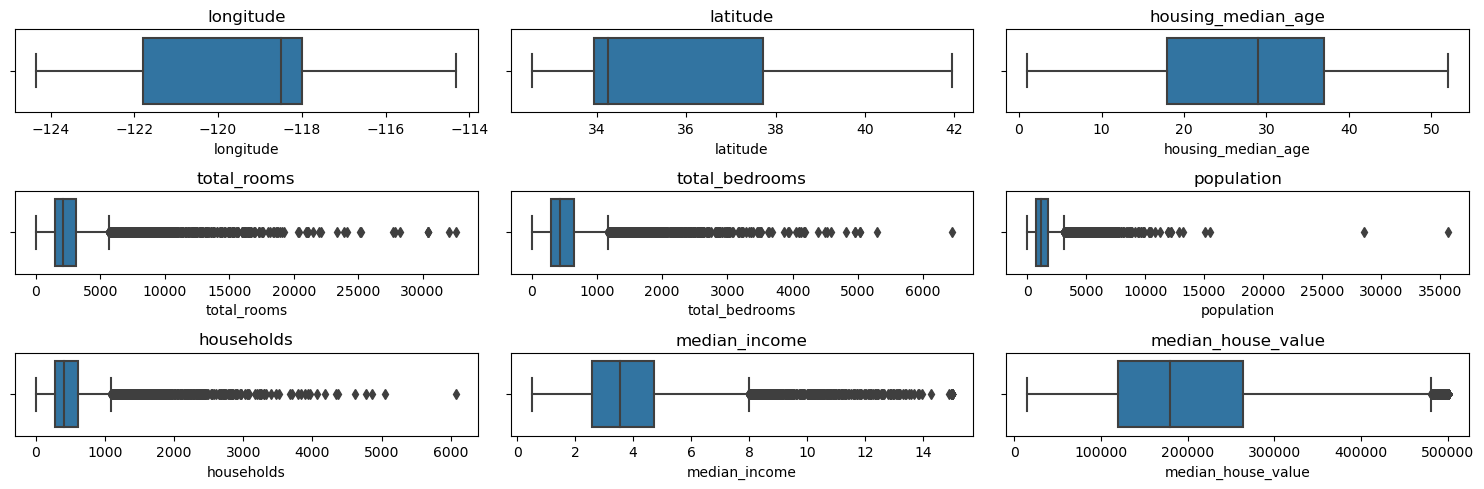

In [90]:
fig = plt.figure(figsize=(15,5)) 

count = 0
for kolom in df_model.select_dtypes(include=['float','int']).columns:
    count += 1
    plt.subplot(3,3,count)
    sns.boxplot(df_model, x = kolom)
    plt.title(f'{kolom}')

fig.tight_layout()
plt.show()

In [91]:
list_kolom = []
list_lim_bawah = []
list_lim_atas = []
list_min = []
list_max = []


for kolom in df_model.select_dtypes(include=['float','int']).columns:
    data = df_model[kolom]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    list_kolom.append(kolom)
    list_lim_bawah.append(limit_bawah)
    list_lim_atas.append(limit_atas)

    min_data = data.min()
    list_min.append(min_data)
    max_data = data.max()
    list_max.append(max_data)


pd.DataFrame(
{ 'Kolom' : list_kolom,
 'Limit Bawah' : list_lim_bawah,
 'Limit_Atas' : list_lim_atas,
 'Min' : list_min,
 'Max' : list_max
}
)


,Kolom,Limit Bawah,Limit_Atas,Min,Max
0,longitude,-127.50000,-112.30000,-124.3500,-114.3100
1,latitude,28.25250,43.39250,32.5400,41.9500
2,housing_median_age,-10.50000,65.50000,1.0000,52.0000
3,total_rooms,-1083.00000,5677.00000,2.0000,32627.0000
4,total_bedrooms,-233.00000,1175.00000,1.0000,6445.0000
5,population,-623.00000,3129.00000,3.0000,35682.0000
6,households,-207.75000,1090.25000,1.0000,6082.0000
7,median_income,-0.68065,7.98615,0.4999,15.0001
8,median_house_value,-97125.00000,480275.00000,14999.0000,500001.0000


In [92]:
df_model[df_model['total_bedrooms']>1175].sort_values(by = 'total_bedrooms', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
12960,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,<1H OCEAN,174300.0
10900,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,INLAND,212200.0
13215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,<1H OCEAN,212300.0
...,...,...,...,...,...,...,...,...,...,...
12681,-122.44,37.52,16.0,7077.0,1179.0,3502.0,1148.0,5.9919,NEAR OCEAN,345100.0
8949,-121.44,38.47,5.0,5666.0,1178.0,3139.0,1131.0,3.3608,INLAND,108900.0
5890,-117.80,34.05,5.0,4536.0,1178.0,2485.0,909.0,4.1118,<1H OCEAN,125900.0
7375,-121.85,39.77,17.0,5273.0,1177.0,2446.0,1199.0,1.9362,INLAND,89900.0


In [93]:
df_model[df_model['population']>3129].sort_values(by = 'population', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
12657,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,<1H OCEAN,339700.0
13215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,<1H OCEAN,212300.0
...,...,...,...,...,...,...,...,...,...,...
14204,-118.40,34.28,22.0,3517.0,810.0,3134.0,847.0,2.6652,<1H OCEAN,164800.0
1666,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,INLAND,58400.0
10173,-117.09,34.07,24.0,6260.0,1271.0,3132.0,1189.0,2.5156,INLAND,103000.0
10201,-117.98,34.07,15.0,3543.0,888.0,3131.0,823.0,3.0184,INLAND,139400.0


In [94]:
df_model[df_model['households']>1090].sort_values(by = 'households', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
10900,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,INLAND,212200.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0
9809,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,INLAND,103400.0
...,...,...,...,...,...,...,...,...,...,...
4661,-118.34,33.87,28.0,4605.0,1188.0,2558.0,1093.0,3.6988,<1H OCEAN,266600.0
9269,-119.08,35.36,12.0,6442.0,1116.0,2966.0,1092.0,4.5791,INLAND,123400.0
14061,-117.27,34.39,6.0,6988.0,1121.0,3660.0,1092.0,4.2224,INLAND,125700.0
7674,-122.05,37.95,22.0,5175.0,1213.0,2804.0,1091.0,2.8500,NEAR BAY,144600.0


In [95]:
df_model[df_model['median_income']>7.6]['median_income'].value_counts

<bound method IndexOpsMixin.value_counts of 6         8.8470
8        13.0502
43        8.2883
73        8.2069
106       7.8496
          ...   
14314    11.5199
14346     8.8204
14371     8.7939
14372     7.8904
14377     7.8426
Name: median_income, Length: 602, dtype: float64>

In [96]:
df_model[df_model['median_house_value']>480275]['median_house_value'].value_counts

<bound method IndexOpsMixin.value_counts of 8        500001.0
43       500001.0
106      490800.0
133      500001.0
158      483800.0
           ...   
14371    500001.0
14377    500001.0
14411    492500.0
14413    500001.0
14446    484600.0
Name: median_house_value, Length: 751, dtype: float64>

<Axes: xlabel='median_house_value', ylabel='Count'>

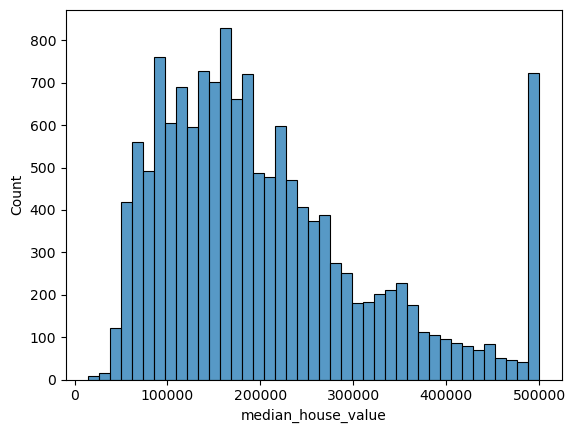

In [97]:
sns.histplot(df_model['median_house_value'])

Dari analisa diatas dapat untuk outliers yang akan dilakukan handling sebagai berikut:
- terdapat penumpukan data pada median house value untuk nilai diatas $500.000, atau dalam hal ini nilai maksimum rumah adalah $500.001.
- terdapat anomali data yaitu pada populasi > 28.566, apabila di bandingkan dengan total bedrooms, rationya perbandingannya > 4 orang dalam 1 kamar tidur, hal tersebut dinilai tidak wajar. 
- terdapat banyak outliers dalam median income

atas ketiga hal tersebut akan dilakukan handling outliers dan anomali pada dataset. 


## **Handling Outliers and Anomalies**

In [98]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_house_value'] <= 480275.0)]
df_model = df_model[(df_model['median_income'] <= 7.6)]
df_model = df_model[(df_model['population'] <= 28566)]

df_model = df_model[(df_model['ocean_proximity'] != 'ISLAND')]


In [99]:
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000
mean,-119.561097,35.660099,28.447698,2603.108883,540.710220,1439.840430,501.455433,3.570862,187197.416610
std,2.007826,2.158045,12.475433,2146.967567,422.600658,1120.103891,382.393026,1.408647,92155.940326
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.740000,33.930000,18.000000,1437.000000,297.000000,795.000000,281.000000,2.508900,115100.000000
50%,-118.500000,34.280000,29.000000,2099.000000,438.000000,1182.000000,412.000000,3.402800,170900.000000
75%,-117.990000,37.730000,37.000000,3107.000000,651.000000,1745.000000,607.000000,4.486100,241100.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,7.599200,480100.000000


In [100]:
df_model.describe(include='object')


,ocean_proximity
count,13317
unique,4
top,<1H OCEAN
freq,5752


In [101]:
proximity_table = df_model.groupby('ocean_proximity').agg({'households': 'count', 'median_house_value': 'median'}).reset_index()
proximity_table

,ocean_proximity,households,median_house_value
0,<1H OCEAN,5752,203900.0
1,INLAND,4487,107900.0
2,NEAR BAY,1413,211500.0
3,NEAR OCEAN,1665,213500.0


<bound method Figure.tight_layout of <Figure size 1200x400 with 2 Axes>>

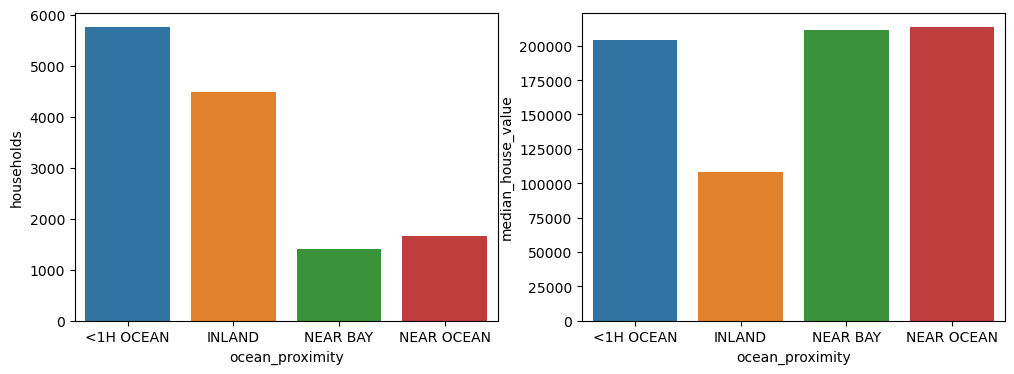

In [102]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x='ocean_proximity',y='households',data=proximity_table)
plt.subplot(1,2,2)
sns.barplot(x='ocean_proximity',y='median_house_value',data=proximity_table)
fig.tight_layout


## **Feature Engineering** 

Dalam EDA, terdapat korelasi yang kuat antar variabel total bedrooms, total rooms, households, dan population. untuk menghindari hal tersebut dapat dilakukan feature engineering yaitu melakukan transformasi dan pembuatan fitur-fitur baru dari data mentah (raw data) agar lebih sesuai dengan kebutuhan algoritma pembelajaran mesin dan meningkatkan kinerja model. Hal tersebut dapat membantu mengurangi overfitting dengan memilih fitur-fitur yang penting dan menghilangkan atau menyesuaikan fitur-fitur yang tidak relevan atau redundan.

In [103]:
df_model['bedrooms_ratio'] = df_model['total_bedrooms']/df_model['total_rooms']
df_model['rooms_per_household'] = df_model['total_rooms']/df_model['households']
df_model['population_per_household'] = df_model['population']/df_model['households']


<Axes: >

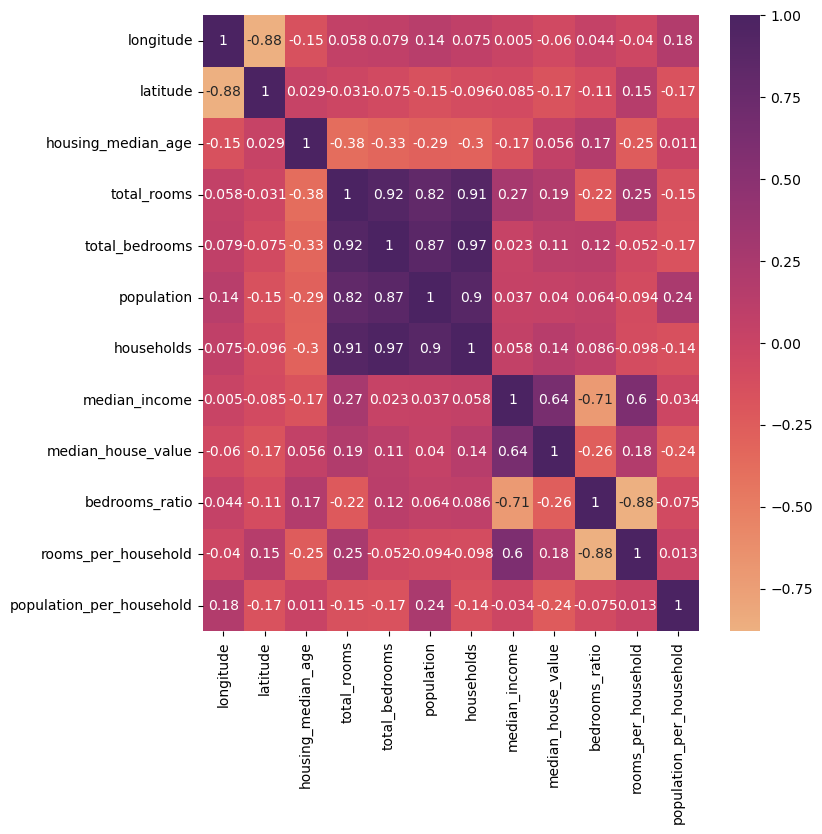

In [104]:
plt.figure(figsize=(8,8))
sns.heatmap(df_model.select_dtypes(include=['int','float']).corr(method='spearman'),annot=True,cmap='flare')

In [105]:
df_model.drop(columns=['total_rooms','total_bedrooms','population','households'],inplace=True)

## Variance Inflation Factor (VIF)

In [106]:
df_model_vif = df_model.copy()

In [107]:
#def calculate_vif(df) only for numeric
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Feature', 'VIF'])
    x_var = df_model.select_dtypes(include=[np.number])
    x_var = x_var.drop(['median_house_value'], axis=1)
    x_var = x_var.dropna()
    vif_df['Feature'] = x_var.columns
    vif_df['VIF'] = [variance_inflation_factor(x_var.values, i) for i in range(len(x_var.columns))]
    return vif_df

calculate_vif(df_model).sort_values(by='VIF', ascending=False)

,Feature,VIF
0,longitude,799.019994
1,latitude,576.307886
4,bedrooms_ratio,29.666459
3,median_income,13.618185
5,rooms_per_household,7.778453
2,housing_median_age,6.615168
6,population_per_household,1.184935


In [108]:
#drop langitude and latitude
df_model_vif.drop(['longitude', 'latitude'], axis=1, inplace=True)
calculate_vif(df_model_vif).sort_values(by='VIF', ascending=False)

,Feature,VIF
0,longitude,799.019994
1,latitude,576.307886
4,bedrooms_ratio,29.666459
3,median_income,13.618185
5,rooms_per_household,7.778453
2,housing_median_age,6.615168
6,population_per_household,1.184935


Interpretasi VIF
- VIF = 1: Tidak ada korelasi antara variabel independen dan variabel lainnya.
- 1 < VIF < 11: Tingkat korelasi yang dapat diterima.
- VIF > 11: Multikolinearitas yang signifikan, yang menunjukkan bahwa variabel ini sangat berkorelasi dengan variabel independen lainnya dan dapat menyebabkan masalah dalam model.

Dari pengecekan multikolinearitas, variabel longitude dan latitude memiliki nilai VIF > 500. Dalam beberapa literatur, nilai VIF hanya diperlukan untuk model regresi linear. Dalam model ini kita akan melakukan melakukan model regresi linear dan non parametrik. Model non parametrikrobust terhadap multikolinearitas. Sebagai perbandingan kita akan bandingkan model dengan melakukan drop variabel yang multikolinearitas dengan tidak.

# 4. Modeling

In [109]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from skopt import BayesSearchCV

## Modelling Drop Variabel Multikolinearitas

In [110]:
# define X and y

X_vif = df_model_vif.drop(columns='median_house_value')
y_vif = df_model_vif['median_house_value']

In [111]:
# data spliting

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(
    X_vif,
    y_vif,
    test_size=0.2,
    random_state= 2024
)

### Encoding

In [112]:
numerik_features = ['bedrooms_ratio', 'median_income', 'rooms_per_household', 'housing_median_age','population_per_household']

kategorik_features = ['ocean_proximity']

In [113]:
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numerik_features),
    ('One Hot', OneHotEncoder(drop = 'first'), kategorik_features)
], remainder='passthrough')

### Benchmark Model

In [114]:
# model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)


# Define models
models = [lr, knn, dt, rf, xgb]

mean_mae_list = []
std_mae_list = []
mean_rmse_list = []
std_rmse_list = []
mean_mape_list = []
std_mape_list = []


# Loop through each model
for idx, model in enumerate(models):
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # MAE
    score_mae = cross_val_score(
        estimator, 
        X_train_vif, 
        y_train_vif, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    mean_mae = np.mean(-score_mae)
    std_mae = np.std(-score_mae)
    mean_mae_list.append(mean_mae)
    std_mae_list.append(std_mae)

    # RMSE
    score_rmse = cross_val_score(
        estimator, 
        X_train_vif, 
        y_train_vif, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    mean_rmse = np.mean(-score_rmse)
    std_rmse = np.std(-score_rmse)
    mean_rmse_list.append(mean_rmse)
    std_rmse_list.append(std_rmse)

    # MAPE
    score_mape = cross_val_score(
        estimator, 
        X_train_vif, 
        y_train_vif, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    mean_mape = np.mean(-score_mape)
    std_mape = np.std(-score_mape)
    mean_mape_list.append(mean_mape)
    std_mape_list.append(std_mape)

result_vif = pd.DataFrame(
        {'Model' : ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
        'Mean_RMSE': mean_rmse_list,
        'Std_RMSE': std_rmse_list,
        'Mean_MAE': mean_mae_list,
        'Std_MAE': std_mae_list,
        'Mean_MAPE': mean_mape_list,
        'Std_MAPE': std_mape_list}
    ).sort_values(by='Mean_MAE', ascending=True)

result_vif


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,54531.486915,1029.140014,39428.727026,857.372178,0.243755,0.004851
4,XGBoost Regressor,56246.140645,852.503165,40352.944140,866.815144,0.247359,0.004721
1,KNN Regressor,57236.417141,1521.857410,40930.464941,1230.901900,0.250797,0.006724
0,Linear Regression,61763.281963,1495.697552,45859.841892,1103.528603,0.282956,0.006815
2,DecisionTree Regressor,74730.014671,1843.807598,53588.503445,1142.613003,0.323907,0.005391


## Modelling Tanpa Drop Variabel Multikolinearitas

In [115]:
# define X and y

X = df_model.drop(columns='median_house_value')
y = df_model['median_house_value']

In [116]:
# data spliting

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state= 2024
)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10653, 8), (2664, 8), (10653,), (2664,))

### Encoding

In [118]:
numerik_features = ['bedrooms_ratio', 'median_income', 'rooms_per_household', 'housing_median_age','population_per_household']

kategorik_features = ['ocean_proximity']

In [119]:
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numerik_features),
    ('One Hot', OneHotEncoder(drop = 'first'), kategorik_features)
], remainder='passthrough')

### Benchmark Model

In [120]:
# model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)


# Define models
models = [lr, knn, dt, rf, xgb]

mean_mae_list = []
std_mae_list = []
mean_rmse_list = []
std_rmse_list = []
mean_mape_list = []
std_mape_list = []


# Loop through each model
for idx, model in enumerate(models):
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # MAE
    score_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    mean_mae = np.mean(-score_mae)
    std_mae = np.std(-score_mae)
    mean_mae_list.append(mean_mae)
    std_mae_list.append(std_mae)

    # RMSE
    score_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    mean_rmse = np.mean(-score_rmse)
    std_rmse = np.std(-score_rmse)
    mean_rmse_list.append(mean_rmse)
    std_rmse_list.append(std_rmse)

    # MAPE
    score_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    mean_mape = np.mean(-score_mape)
    std_mape = np.std(-score_mape)
    mean_mape_list.append(mean_mape)
    std_mape_list.append(std_mape)

result = pd.DataFrame(
        {'Model' : ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
        'Mean_RMSE': mean_rmse_list,
        'Std_RMSE': std_rmse_list,
        'Mean_MAE': mean_mae_list,
        'Std_MAE': std_mae_list,
        'Mean_MAPE': mean_mape_list,
        'Std_MAPE': std_mape_list}
    ).sort_values(by='Mean_MAE', ascending=True)

result


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,42907.467341,783.003873,28920.887412,465.879967,0.173319,0.004071
3,RandomForest Regressor,44949.518166,841.222812,30497.770101,730.704707,0.182516,0.003482
1,KNN Regressor,48963.207168,1448.942402,33205.108191,1007.524820,0.194962,0.004321
2,DecisionTree Regressor,63662.288829,945.053484,43069.939729,625.858715,0.251554,0.002590
0,Linear Regression,60552.727665,1489.759288,45072.493249,1135.824083,0.282834,0.005953


In [121]:
print('Dengan drop nilai VIF')
display(result_vif)

print('Tanpa drop nilai VIF')
display(result)


Dengan drop nilai VIF


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,54531.486915,1029.140014,39428.727026,857.372178,0.243755,0.004851
4,XGBoost Regressor,56246.140645,852.503165,40352.944140,866.815144,0.247359,0.004721
1,KNN Regressor,57236.417141,1521.857410,40930.464941,1230.901900,0.250797,0.006724
0,Linear Regression,61763.281963,1495.697552,45859.841892,1103.528603,0.282956,0.006815
2,DecisionTree Regressor,74730.014671,1843.807598,53588.503445,1142.613003,0.323907,0.005391


Tanpa drop nilai VIF


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,42907.467341,783.003873,28920.887412,465.879967,0.173319,0.004071
3,RandomForest Regressor,44949.518166,841.222812,30497.770101,730.704707,0.182516,0.003482
1,KNN Regressor,48963.207168,1448.942402,33205.108191,1007.524820,0.194962,0.004321
2,DecisionTree Regressor,63662.288829,945.053484,43069.939729,625.858715,0.251554,0.002590
0,Linear Regression,60552.727665,1489.759288,45072.493249,1135.824083,0.282834,0.005953


Dari perbandingan tersebut, dapat kita simpulkan bahwa model ini bekerja dengan baik dengan tidak melakukan drop nilai VIF (langitude & latitude). Dari uji menggunakan train set dapat kita lihat bahwa model XGBoost dan Random Forest memiliki nilai metrik yang rendah diantara model lainnya. Kedua model tersebut merupakan model non parametrik yang mana robust terhadap multikolinearitas.

Selanjutnya kita akan melakukan uji menggunakan predict dengan menggunakan data test dengan kedua model tersebut.

## Predict with Test Set using model XGBoost dan Random Forest

In [122]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}
score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set

for i in models:
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,43217.026775,28454.515679,0.168018
RandomForest,44551.410873,29488.826573,0.174188


Dari hasil uji test set, dapat kita lihat bahwa uji pada data set memiliki nilai prediksi yang lebih baik dibanding dengan train set, melihat nilai RMSE, MAE, dan MAPE yang turun dibanding pada uji train set. Model yang selanjutnya kita pilih adalah XGBoost Regressor karna memiliki nilai RMSE, MAE, dan MAPE lebih rendah dari model random forest. Selanjutnya kita melakukan hyper paramater tunning dengan model XGBoost Regresor untuk mendapatkan model yang terbaik.

Gradient Boosting adalah teknik ensemble yang membangun model prediktif yang kuat dengan menggabungkan sejumlah model prediktif yang lebih lemah, biasanya pohon keputusan. Prosesnya bekerja secara iteratif, di mana setiap model baru mencoba untuk memperbaiki kesalahan dari model sebelumnya.

**Parameter dalam XGBoost**
1. Learning Rate (eta) default = 0.3:

    Mengontrol seberapa besar kontribusi setiap pohon baru terhadap model ensemble. Nilai lebih kecil membuat proses belajar lebih lambat namun lebih stabil.
2. Number of Trees (n_estimators) default = 100:

    Jumlah pohon yang akan dibangun dalam proses boosting.
3. Maximum Depth (max_depth) default = 6:

    Kedalaman maksimal setiap pohon keputusan. Kontrol ini membantu mengatur kompleksitas model.
4. Subsample default = 1:

    Proporsi data yang digunakan untuk membangun setiap pohon. Ini membantu dalam regularisasi dan mengurangi overfitting.
5. Colsample_bytree default = 1:

    Proporsi fitur yang dipilih secara acak untuk digunakan dalam setiap pohon.

**Kelebihan XGBoost**
- Efisiensi dan Kecepatan: XGBoost dirancang untuk efisiensi komputasi, sehingga sangat cepat bahkan pada dataset yang besar.
- Regularisasi: Menerapkan teknik regularisasi untuk mengurangi overfitting.
- Flexibilitas: Mendukung berbagai fungsi loss dan konfigurasi hiperparameter yang luas.
- Parallel Processing: Mendukung pemrosesan paralel untuk mempercepat pelatihan.

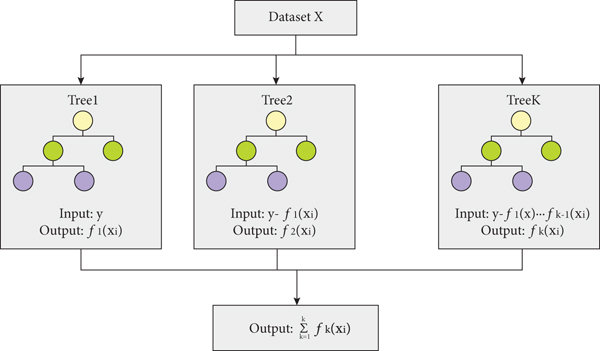

## **Hyper Paramater Tunning**

Dalam hyper parameter tunning ini, akan menggunakan Bayesian Search CV (Bayesian Search Cross-Validation) adalah metode yang lebih efisien dan cerdas untuk mencari hyperparameter optimal dalam model machine learning. Metode ini menggunakan prinsip Bayesian Optimization untuk memilih kombinasi hyperparameter berdasarkan hasil evaluasi sebelumnya, mempercepat proses pencarian dan meningkatkan peluang menemukan hyperparameter yang optimal.


**Proses Bayesian Search CV:**

1. Inisialisasi: Tentukan model (estimator) dan ruang pencarian parameter (search space).
2. Sampling: Dari ruang pencarian, ambil sampel parameter secara acak berdasarkan distribusi yang telah ditentukan.
3. Cross-Validation: Evaluasi model dengan parameter yang diambil dari sampel.
4. Optimisasi: Berdasarkan hasil evaluasi, pilih parameter yang memberikan performa terbaik.
5. Iterasi: Ulangi langkah 2-4 hingga mencapai jumlah iterasi yang ditentukan.

**Keuntungan Bayesian Search CV**
- Efisiensi: Lebih efisien daripada Grid Search karena tidak perlu mengevaluasi semua kombinasi hyperparameter yang mungkin.
- Eksploitasi Informasi Sebelumnya: Menggunakan informasi dari pencarian sebelumnya untuk memandu pencarian berikutnya, mengarah pada konvergensi lebih cepat ke hyperparameter optimal.
- Balancing Eksplorasi dan Eksploitasi: Secara adaptif menyeimbangkan antara mencoba kombinasi hyperparameter baru dan memanfaatkan kombinasi yang sudah diketahui memberikan hasil baik.

## XGBoost Tunning Parameter

In [123]:
# Kedalaman pohon
max_depth = list(np.arange(0, 20))

# Jumlah pohon
n_estimators = list(np.arange(100, 500,50))

# Learning rate
learning_rate = list(np.arange(1, 100,10)/100)

# Subsample
subsample = list(np.arange(0,11)/10)



In [124]:
# Define the parameter grid
param_grid = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__subsample' : subsample
}

# Create the Random Forest Regressor model
xgb = XGBRegressor()

# Create the pipeline
estimator_xgb = Pipeline([
        ('preprocessing', preprocessor),
        ('model', xgb)
])

# Create the RandomizedSearchCV object
bayes_search = BayesSearchCV(estimator_xgb, 
                                   search_spaces=param_grid, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_absolute_error', 
                                   n_jobs=-1, 
                                   random_state=1)

# Fit the RandomizedSearchCV object to the training data
bayes_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: OrderedDict([('model__learning_rate', 0.11), ('model__max_depth', 7), ('model__n_estimators', 300), ('model__subsample', 0.7)])
Best Score: -27970.20666196784


In [140]:
pd.DataFrame(bayes_search.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.551470,0.015306,0.011923,0.001489,0.11,7,300,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-28081.976975,-27640.435179,-27410.950388,-28751.292248,-27966.378519,-27970.206662,456.972376,1
60,0.594709,0.029038,0.013352,0.001462,0.11,7,350,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-28072.093308,-27668.843686,-27503.301667,-28813.708825,-27967.153998,-28005.020297,452.691082,2
33,0.643690,0.022270,0.015616,0.004372,0.11,7,300,0.6,"{'model__learning_rate': 0.11, 'model__max_dep...",-27708.605095,-27864.078105,-27517.432325,-29007.400600,-28351.185871,-28089.740399,535.570369,3
59,0.630943,0.025963,0.017006,0.007964,0.11,7,350,0.6,"{'model__learning_rate': 0.11, 'model__max_dep...",-27708.170954,-27891.106706,-27525.656157,-28986.559925,-28453.223172,-28112.943383,536.088559,4
48,0.257428,0.011842,0.007216,0.000171,0.11,5,300,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-27816.358532,-27963.338157,-27692.826246,-28840.692678,-28410.867369,-28144.816596,424.297286,5


In [139]:
pd.DataFrame(bayes_search.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.551470,0.015306,0.011923,0.001489,0.11,7,300,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-2.808198e+04,-2.764044e+04,-2.741095e+04,-2.875129e+04,-2.796638e+04,-2.797021e+04,4.569724e+02,1
60,0.594709,0.029038,0.013352,0.001462,0.11,7,350,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-2.807209e+04,-2.766884e+04,-2.750330e+04,-2.881371e+04,-2.796715e+04,-2.800502e+04,4.526911e+02,2
33,0.643690,0.022270,0.015616,0.004372,0.11,7,300,0.6,"{'model__learning_rate': 0.11, 'model__max_dep...",-2.770861e+04,-2.786408e+04,-2.751743e+04,-2.900740e+04,-2.835119e+04,-2.808974e+04,5.355704e+02,3
59,0.630943,0.025963,0.017006,0.007964,0.11,7,350,0.6,"{'model__learning_rate': 0.11, 'model__max_dep...",-2.770817e+04,-2.789111e+04,-2.752566e+04,-2.898656e+04,-2.845322e+04,-2.811294e+04,5.360886e+02,4
48,0.257428,0.011842,0.007216,0.000171,0.11,5,300,0.7,"{'model__learning_rate': 0.11, 'model__max_dep...",-2.781636e+04,-2.796334e+04,-2.769283e+04,-2.884069e+04,-2.841087e+04,-2.814482e+04,4.242973e+02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.369149,0.025550,0.013521,0.000159,0.91,8,300,0.2,"{'model__learning_rate': 0.91, 'model__max_dep...",-8.969980e+07,-7.331808e+07,-1.106362e+08,-4.496362e+07,-9.307870e+07,-8.233928e+07,2.212939e+07,96
86,0.226775,0.012750,0.009428,0.000372,0.81,5,400,0.1,"{'model__learning_rate': 0.81, 'model__max_dep...",-3.641317e+07,-6.489524e+08,-3.182189e+08,-6.831871e+08,-2.629234e+09,-8.632010e+08,9.140856e+08,97
68,0.449599,0.031946,0.017783,0.000358,0.71,8,400,0.1,"{'model__learning_rate': 0.71, 'model__max_dep...",-6.905477e+09,-1.593832e+09,-1.902421e+09,-1.789307e+09,-3.088634e+09,-3.055934e+09,1.994629e+09,98
75,5.123138,0.113235,0.144600,0.031382,0.81,19,400,0.2,"{'model__learning_rate': 0.81, 'model__max_dep...",-2.948429e+11,-3.598038e+11,-2.136267e+11,-3.142221e+11,-4.310249e+11,-3.227041e+11,7.191086e+10,99


In [126]:
# Define model terhadap estimator terbaik
xgb_tuning = bayes_search.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['XGBoost Regressor'])


In [127]:
print('Scoring Before Tuning')
display(score_before_tuning)

print('Scoring After Tuning')
display(score_after_tuning)

Scoring Before Tuning


,RMSE,MAE,MAPE
XGB,43217.026775,28454.515679,0.168018
RandomForest,44551.410873,29488.826573,0.174188


Scoring After Tuning


,RMSE,MAE,MAPE
XGBoost Regressor,41104.069267,26869.059896,0.15792


Dari hasil tunning dapat kita lihat bahwa terdapat peningkatan performa dengan pemilihan parameter menggunakan Bayesian Search CV, dimana nilai MAE turun dari $28.454 menjadi $26.869. Adapun parameter yang selanjutnya kita gunakan dalam modelling sebagai berikut: 
- Learning Rate : 0.11
- Max Depth : 7
- N Estimators : 300
- Subsample : 0.7

<img src="nterpretation-of-typical-MAPE-values.png"/>

Dengan model tersebut, nilai MAE $26.869 dan MAPE 15.79%. Menurut Lewis(1982, p.40) nilai MAPE tersebut masih tergolong *Good Forecasting* sehingga model tersebut dapat kita terima dan selanjutnya kita akan lakukan evaluasi model dan relevansi dengan keadaan saat ini.

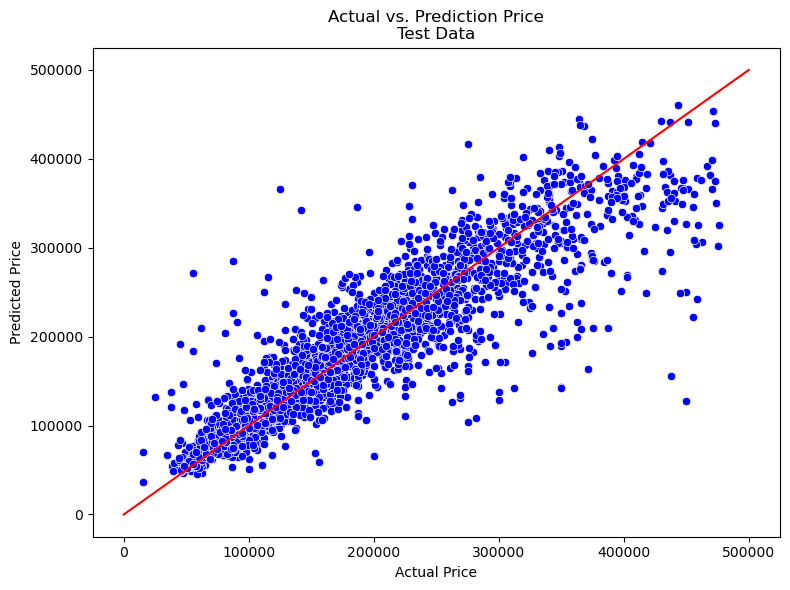

In [141]:
# Tampilkan hasil prediksi
mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
hasil_test_XGB = pd.DataFrame({'Predicted':y_pred_xgb_tuning,'Actual':y_test})
hasil_test_XGB['Different'] = hasil_test_XGB['Predicted'] - hasil_test_XGB['Actual']

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, color='blue').set(title='Actual vs. Prediction Price\nTest Data', 
                                                                          xlabel='Actual Price', 
                                                                          ylabel='Predicted Price')
sns.lineplot(x=np.arange(0, 500000), y=np.arange(0, 500000), color='red')
plt.tight_layout()
plt.show()



## Metrics Evaluation

In [129]:
mape_table = pd.DataFrame({'median_house_value': y_test, 'predicted_house_value': y_pred_xgb_tuning})

# Sort DataFrame by 'median_house_value'
mape_table = mape_table.sort_values('median_house_value', ascending=True)

# Calculate MSE
def mse_score(y_test, y_pred): 
   return (y_test - y_pred)**2

mse = mse_score(y_test, y_pred_xgb_tuning)

# Assign MSE to all rows
mape_table['MSE'] = mse

# Calculate MAE
def mae_score(y_test, y_pred): 
   return np.abs(y_test - y_pred)

mae = mae_score(y_test, y_pred_xgb_tuning)

# Assign MAE to all rows
mape_table['MAE'] = mae

# Calculate MAPE
def mape_score(y_test, y_pred):
   return np.abs((y_test - y_pred)/y_test*100)
        
mape = mape_score(y_test, y_pred_xgb_tuning)

# Assign MAPE to all rows
mape_table['MAPE'] = mape


# Determine bins based on 'median_house_value'
num_bins = 5  
bins = pd.cut(mape_table['median_house_value'], bins=num_bins)

# Add bins to DataFrame
mape_table['bins'] = bins

# Display DataFrame with bins
mape_table

,median_house_value,predicted_house_value,MSE,MAE,MAPE,bins
6572,14999.0,36480.753906,4.614658e+08,21481.753906,143.221241,"(14537.699, 107259.2]"
1376,14999.0,70848.164062,3.119129e+09,55849.164062,372.352584,"(14537.699, 107259.2]"
254,25000.0,132350.078125,1.152404e+10,107350.078125,429.400312,"(14537.699, 107259.2]"
5956,34600.0,67165.781250,1.060530e+09,32565.781250,94.120755,"(14537.699, 107259.2]"
199,37500.0,137574.281250,1.001486e+10,100074.281250,266.864750,"(14537.699, 107259.2]"
...,...,...,...,...,...,...
4019,472700.0,374770.375000,9.590211e+09,97929.625000,20.717077,"(384039.8, 476300.0]"
3996,472800.0,440826.187500,1.022325e+09,31973.812500,6.762651,"(384039.8, 476300.0]"
4324,474100.0,350066.156250,1.538439e+10,124033.843750,26.161958,"(384039.8, 476300.0]"
9730,475000.0,302321.343750,2.981792e+10,172678.656250,36.353401,"(384039.8, 476300.0]"


In [130]:
# Calculate RMSE with square root and mean MAPE
bins_table = pd.DataFrame(mape_table.groupby('bins').agg({'MSE': lambda x: np.sqrt(np.mean(x)), 'MAE' : 'mean','MAPE': 'mean'})).reset_index()

# Rename the columns for clarity
bins_table = bins_table.rename(columns={'MSE': 'RMSE', 'bins': 'Median House Value'})

# Display the resulting DataFrame
bins_table


,Median House Value,RMSE,MAE,MAPE
0,"(14537.699, 107259.2]",28554.922963,16944.435160,24.154451
1,"(107259.2, 199519.4]",29859.660484,20847.644783,13.859993
2,"(199519.4, 291779.6]",39642.737877,29514.058812,12.157027
3,"(291779.6, 384039.8]",62749.736725,46085.409399,13.769473
4,"(384039.8, 476300.0]",97788.027847,77340.787916,17.899869


Dengan model XGBoost Regresor, model ini baik memprediksi pada interval $107.259 sd $476.300, dan pada interval $14.537 sd $107.259 masih dikatakan cukup baik untuk memprediksi. 

## **Feature Importance**

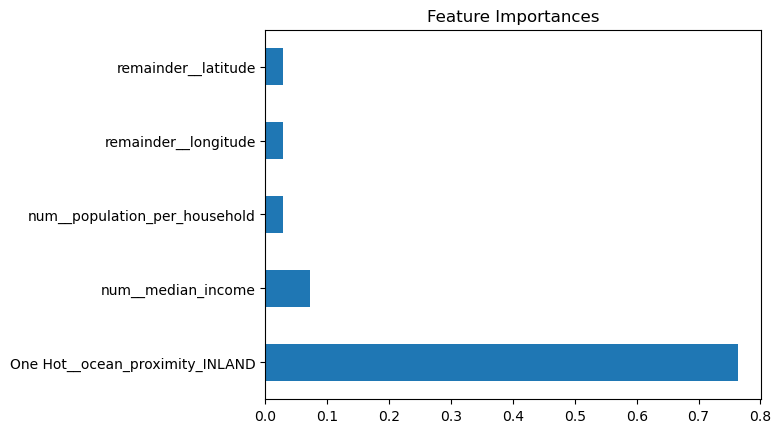

In [151]:
# Plot feature importances
preprocessor.fit_transform(X_train)
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_,preprocessor.get_feature_names_out()).sort_values(ascending = False).head(5)
feature_imp.plot(kind='barh', title='Feature Importances');

Dengan model XGBoost Regresor, variabel yang berpengaruh terhadap prediksi harga rumah di California adalah variabel ocean proximity. Dimana apabila rumah tersebut terletak pada Inland, harga rumah tersebut cenderung lebih murah dibanding dengan harga rumah yang memiliki akses dekat dengan Pantai dengan nilai importance 76,3%. Sedangkan median income memiliki fitur importance 7,25%, population per household 2,89%, longitute sebesar 2,86%, dan latitude sebesar 2,83%. Kelima fitur ini sudah cukup untuk memodelkan prediksi harga rumah di CA sebesar 92,18%

# 5. Model Evaluation

## Save Model

In [132]:
import streamlit # deploy
import pickle # save model -> model.pkl

with open('xgb_model.pkl', 'wb') as file_model:
    pickle.dump(xgb_tuning, file_model)

## Load Pickle

In [133]:
with open('xgb_model.pkl','rb') as file_model:
    xgb_load = pickle.load(file_model)

## Evaluasi

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13317 entries, 0 to 14447
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13317 non-null  float64
 1   latitude                  13317 non-null  float64
 2   housing_median_age        13317 non-null  float64
 3   median_income             13317 non-null  float64
 4   ocean_proximity           13317 non-null  object 
 5   bedrooms_ratio            13317 non-null  float64
 6   rooms_per_household       13317 non-null  float64
 7   population_per_household  13317 non-null  float64
dtypes: float64(7), object(1)
memory usage: 936.4+ KB


<img src="Model Evaluasi.png"/>


Iklan [Rumah California](https://www.bing.com/homes/harga-rumah-di-california/025d70b3-2899-4752-9b5a-670c9aba19b6_en-us--en-ca?formcode=000074) & 
[Lokasi Rumah](https://www.bing.com/maps/directions?rtp=adr.%7Epos.36%2C78505_-119%2C68511_5923+E+Robinson+Ave%2C+Fresno%2C+CA+93727&mepi=121%7ERealEstate%7E%7EDirection_Button&msockid=f3df0e88164611ef96af99443474dc12&cp=36.698202%7E-119.665401&lvl=6.1)

Untuk melakukan evaluasi pada model ini, terdapat beberapa data yang perlu diasumsikan seperti median_income. Untuk memiliki rumah senilai $199.750 dengan sistem KPR selama 20 tahun dengan tingkat suku bunga di CA 9%, maka angsuran perbulan yang dikenakan $1.797, dengan asumsi min DSR (Debt Service Ratio) adalah 50% dari income, maka income min untuk kepemilikan rumah tersebut $3.594 atau dalam setahun senilai $43.128


| Field               | Nilai                          |
|---------------------|--------------------------------|
| longitude           | -119.685091                    |
| latitude            | 36.785032                      |
| housing_median_age  | 51                             |
| median_income       | 4.3128                          |
| ocean_proximity     | <1H OCEAN                      |
| bedrooms_ratio      | 0.75                           |
| rooms_per_households| 3                              |
| population per households       | 4                  |

Menurut [in2013dollars](https://www.in2013dollars.com/us/inflation/1990?amount=1), nilai $1 dolar di tahun 1990, akan bernilai $2,4 di tahun 2024, dengan demikian nilai inflasi 1990 sd 2024 sebesar 140%


In [135]:
test_data = pd.DataFrame({
               'longitude':[-119.685091],
               'latitude':[36.785032],
               'housing_median_age':[51],
               'median_income' : [4.3128],
               'ocean_proximity':['<1H OCEAN'],
               'bedrooms_ratio':[0.75],
               'rooms_per_household':[3],
               'population_per_household':[4]

})

test_data

,longitude,latitude,housing_median_age,median_income,ocean_proximity,bedrooms_ratio,rooms_per_household,population_per_household
0,-119.685091,36.785032,51,4.3128,<1H OCEAN,0.75,3,4


In [136]:
pred = xgb_load.predict(test_data)

# Asumsi tingkat inflasi 1990 - 2024
inflation_rate = 1.4

# Nilai rumah setelah disesuaikan dengan inflasi selama periode tersebut
adjusted_value = pred * (1 + inflation_rate)

market_value = 199750
difference = np.abs(market_value - adjusted_value)
percentage_difference = (difference / market_value) * 100


print(f'Apraisal nilai rumah tersebut: {pred}')
print(f'Dengan asumsi nilai inflasi 140% selama tahun 1990-2024, maka nilai rumah tersebut saat ini: {adjusted_value}')
print(f'Selisih nilai pasar dengan prediksi model: {difference} atau {percentage_difference}%')

Apraisal nilai rumah tersebut: [216843.88]
Dengan asumsi nilai inflasi 140% selama tahun 1990-2024, maka nilai rumah tersebut saat ini: [520425.3]
Selisih nilai pasar dengan prediksi model: [320675.3125] atau [160.53832916]%


Dengan menggunakan dataset yang dimiliki dari tahun 1990 nilai rumah tersebut diprediksi senilai $216.843, dengan asumsi tingkat inflasi di California 1990 sd 2024 140%, maka nilai rumah tersebut di th 2024 senilai $520.425 sedangkan harga pasarnya $199.750, sehingga dapat selisih/eror $320.765 atau 160,5%. Dengan demikian model kita melakukan over appraisal, sehingga apabila customer tersebut diberikan pinjaman Bank memiliki risiko kredit karna nilai jaminan kurang dari kredit yang diberikan. Selain itu, dapat dikatakan bahwa model ini dengan menggunakan dataset tahun 1990 kurang relevan untuk digunakan memprediksi harga rumah di tahun 2024, dan apabila digunakan dalam bisnis dapat memberikan risiko kredit terhadap Bank karna nilai pasar rumah lebih rendah dari nilai apraisal yang apabila kredit tersebut macet/default, nilai jaminan tidak mampu mencover kredit yang diberikan.

# 6. Conclusion & Recomendation

## **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan beberapa kesimpulan yang dapat ditarik sebagai berikut: 

- Model XGBoost dengan parameter Learning Rate : 0.11, Max Depth : 7, N Estimators : 300, Subsample : 0.7 baik dalam meprediksi train dan test set, dengan nilai MAE dan MAPE berada dalam threshold *Good Forecasting*.

- Model tersebut baik dalam bekerja dalam rentang nilau rumah $107.259 sd $476.300 dengan nilai MAPE kurang dari 20%, sedangkan untuk nilai rumah kurang dari $107.259 nilai MAPE sebesar 24% atau $16.944.

- Features Importance dalam model ini adalah ocean proximity, dimana harga rumah Inland akan lebih murah dibanding harga rumah yang dekat dengan Pantai, nilai importance variabel tersebut mencakup 76,3%. Sedangkan variabel median income memiliki fitur importance 7,25%, population per household 2,89%, longitute sebesar 2,86%, dan latitude sebesar 2,83%. Kelima fitur ini sudah cukup untuk memodelkan prediksi harga rumah di CA sebesar 92,18%

- Model tersebut apabila diimplementasikan dengan harga rumah saat ini setelah memperhitungkan faktor inflasi selama tahun 1990 sd 2024 kurang relevan untuk diterapkan, dengan selisih nilai sekitar $320.765 atau 160,5%. Apabila model tersebut diterapkan dalam bisnis perbankan, bank akan memiliki potensi kerugian hingga $320.765 karna selisih nilai prediksi model dengan harga pasar. Bank selaku pemberi kredit dapat risiko kredit, karna nilai jaminan yang diberikan kurang harga pasar rumah tersebut.

## **Recomendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Hasil uji dataset train atau tes set setelah dilakukan tunning penurunan nilai eror pada metric evaluation belum signifikan. Dan untuk mendapatkan model yang lebih baik lagi, dalam pencarian hyper parameter dengan tunning dapat menggunakan grid search sehingga dapat menemukan parameter yang lebih optimal.

2. Dataset yang digunakan dalam model ini merupakan hasil sensus ditahun 1990, sehingga model yang dibuat kurang relevan digunakan untuk ditahun 2024.

3. Untuk membuat model yang lebih relevan agar menambahkan beberapa variabel/fitur yang dapat mendukung model prediksi harga seperti luas tanah, luas bangunan, lebar jalan, dengan penambahan variabel tersebut diharapkan mampu menggambarkan prediksi harga rumah dengan menggunakan harga pasar. 